In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
#mouse file has 250 rows of data
mouse_df = pd.read_csv(mouse_drug_data_to_load)

#clinical file has 1893 rows of data
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(mouse_df, clinical_df, on='Mouse ID')

# Display the data table for preview

In [2]:
mouse_clinical_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [33]:
#mean_tumor_df = mouse_clinical_df.groupby('Drug','Timepoint')['Tumor Volume (mm3)'].mean().to_frame().reset_index()
mean_tumor_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
mean_tumor_df.describe()

,Timepoint,Tumor Volume (mm3)
count,100.000000,100.000000
mean,22.500000,52.345216
std,14.433757,8.980674
min,0.000000,34.955595
25%,10.000000,45.000000
50%,22.500000,51.444575
75%,35.000000,59.813482
max,45.000000,70.662958


In [8]:
mean_tumor_se_df = mouse_clinical_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
mean_tumor_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
#mean tumor volume pivot
mean_pivot_df = mean_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
mean_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [49]:
#mean tumor volume standard error pivot
mean_pivot_se_df = mean_tumor_se_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
mean_pivot_se_df.index


Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

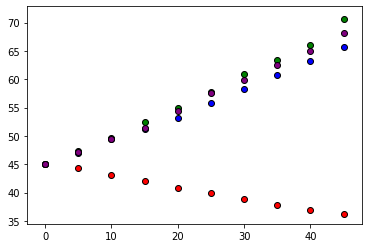

In [58]:
#mean_pivot_se_df.plot(kind="scatter", x="Timepoint", y="Capomulin")
#Capomulin, Infubinol, Ketapril, and Placebo
plt.scatter(mean_pivot_df.index, mean_pivot_df["Capomulin"], marker="o", facecolors="red", edgecolors="black")
plt.scatter(mean_pivot_df.index, mean_pivot_df["Infubinol"], marker="o", facecolors="blue", edgecolors="black")
plt.scatter(mean_pivot_df.index, mean_pivot_df["Ketapril"], marker="o", facecolors="green", edgecolors="black")
plt.scatter(mean_pivot_df.index, mean_pivot_df["Placebo"], marker="o", facecolors="purple", edgecolors="black")





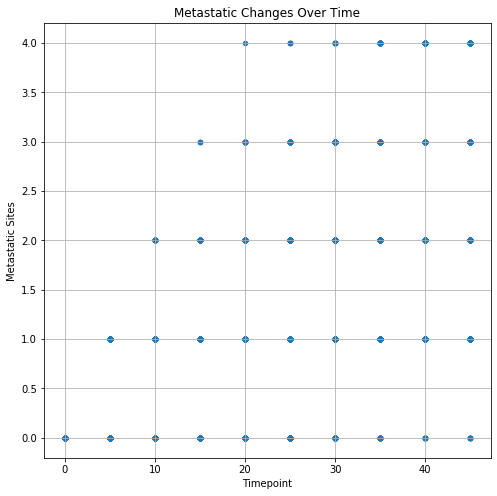

In [10]:
mouse_clinical_df.plot(kind="scatter", x="Timepoint", y="Metastatic Sites", grid=True, figsize=(8,8), title="Metastatic Changes Over Time")